1. Definición del Objetivo

2. Contexto Comercial

Las calificaciones crediticias corporativas, proporcionan una evaluación sobre la solvencia crediticia de una empresa y actúan como un indicador financiero fundamental para los potenciales inversionistas. 

Estas ayudan a entregar a los futuros accionistas una idea concreta sobre el riesgo asociado a la inversión en una empresa en particular, a través de los rendimientos de las inversiones crediticias que posee la empresa. 

Toda empresa aspira a obtener una buena calificación crediticia con el objetivo de buscar más inversionistas y tasas de interés de deuda más bajos.

3. Problema Comercial

4. Data Acquisition

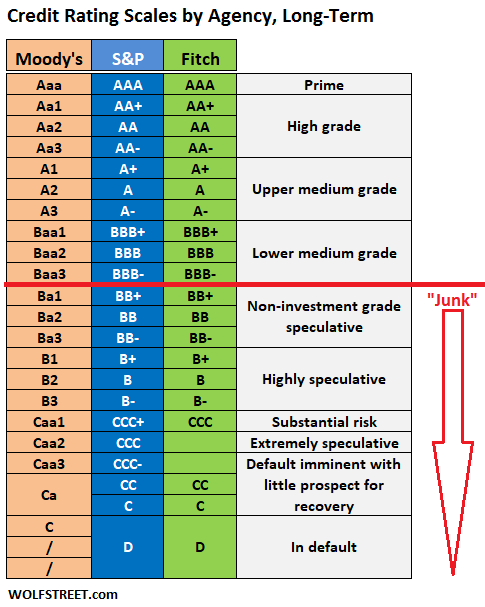

4.1 Importar Librerías

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk

4.2 Obtención Datos

In [2]:
# Fuente: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data
url = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Corporate_Credit_Rating_With_Financial_Ratios.csv'
df = pd.read_csv(url)
df.head(5)

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [3]:
df.shape

(7805, 25)

In [4]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

4.3 Descripción Variables

In [5]:
# Fuentes: https://finviz.com/help/screener.ashx , https://www.sec.gov/search-filings/standard-industrial-classification-sic-code-list ,  

# Corporation: Nombre de la Empresa.
# Rating: Calificación Otorgada por la Agencia Especialista - Calificación S&P Decreciente {AAA, AA+, AA, AA−, A+, A, A−, BBB+, BBB, BBB−, BB+, BB, BB−, B+, B, B−, CCC+, CCC, CCC−, CC, C, D}
# Rating Date: Fecha de Calificación.
# CIK: Identificador único de la Compañía provisto por el SEC (Security and Exchange Comission).
# Binary Rating: Calificación Binaria (1: Empresas con Grado de Inversión, 0: Empresas Basura) 
# SIC Code: Estándar Industrial de Clasificación (USA) - Indica el tipo de Negocio asociado a la Empresa.
# Sector: Grupos en función de las actividades de la Compañia en las cuales se agrupan diferentes Empresas. Relación Directa con el Código SIC.
# Ticker: Abreviación Empresa para Cotizar en Bolsa (Identificador Único)
# Current Ratio: Radio de Liquidez, que mide la capacidad de una empresa para pagar sus obligaciones en el corto plazo. Ratio Actual = Activos Actuales / Pasivos Actuales.
# Long-term Debt / Capital: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Largo Plazo. (Pasivos LP / Capital Accionistas)
# Debt/Equity Ratio (D/E): Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Corto Plazo. (Pasivos Actuales / Capital Accionistas)                                              
# Gross Margin: Porcentaje del total de Ingresos por Ventas que la Compañía retiene después de incurrir en los costos directos de producción de un Bien o Servicio. Margen Bruto = (Ingresos Ventas - Costos Fijos Producción) / Ingresos Ventas 
# Operating Margin: Indica qué proporción de la ganancia de la compañía queda, luego de pagar los costos variables de producción, tales como salarios, insumos, etc. Margen Operacional = Ingresos Operacionales / Ingresos Totales Ventas. 
# EBIT Margin: Earnings Before Interest and Taxes. Ratio que nos indica la rentabilidad de una empresa. Se calcula como las ganancias de esta menos los gatos, exluyendo los impuestos e intereses.
# EBITDA Margin: Earnings Before Interest, Taxes, Depreciation and Amortization. Ratio o medida de rentabilidad, alternativo al Ingreso Neto, el cual busca representar el beneficio en efectivo generado por las operaciones de la compañía.
# Pre-Tax Profit Margin: Mide las ganancias remantentes de la empresa, después de que los gastos operacionales y no operacionales, sin considerar los impuestos, hayan sido descontados. Ganancia Previa a los Impuestos = EBT (Ganancias antes de Impuestos) / Ingresos.
# Net Profit Margin: Ratio de Rentabilidad que mide cuanto de cada Dólar por Ventas, la compañía mantiene como ganancia. Beneficio Neto = Ganancia Neta / Ingresos por Venta.
# Asset Turnover: Mide la eficiencia de los activos de una compañía para generar Ingresos o Ventas. Rotación de Activos = Ingresos por Ventas / Promedio Total de Activos.
# ROE - Return On Equity: Ratio de Rentabilidad que indica cuanta ganancia genera la compañía con el dinero que lo accionistas han invertido en ella. ROE = Ingreso Neto Anual / Capital Accionistas
# Return On Tangible Equity (ROTE): Mide la Eficiencia con la cual una compañía opera y utiliza sus Activos Tangibles para generar Ingresos en el Largo Plazo. ROTE = Ingreso Neto Anual / (Promedio Capital Accionistas - Activos Intangibles)
# ROA - Return On Assets: Indicador que nos da una idea sobre que tan eficiente es la gerencia de una compañía utilizando sus activos para generar ingresos. ROA = ingresos Netos Anuales / Total Activos.
# ROI - Return On Investment: Medida de Desempeño, utilizada para evaluar la eficiencia de una inversión. ROI = (Ingresos de Inversión - Costos de Inversión) / Costos de Inversión
# Operating Cash Flow Per Share: Cantidad de efectivo que genera una empresa a partir de los Ingresos que genera, excluyendo los costos asociados con la Inversión de Capital a Largo Plazo. Medido en lo últimos 12 Meses (TTM)
# Free Cash Flow Per Share: Medida de la Flexibilidad Financiera de una empresa que se determina dividiendo el Flujo de Caja Libre por el número total de Acciones en Circulación. Indicador de los cambios en las ganancias por acción.

In [6]:
# Clasificación de Ratios por Tipo:

# Ratios de Liquidez: Current Ratio.
# Ratios de Rentabilidad: Gross Margin, Operating Margin, EBIT Margin, EBITDA Margin, Pre-Tax Profit Margin, Net Profit Margin, ROE - Return On Equity, Return On Tangible Equity (ROTE), ROA - Return On Assets, ROI - Return On Investment.
# Ratios de Deuda (Pasivos): Long-Term Debt / Capital, Debt/Equity Ratio (D/E).
# Ratios de Desempeño Operacional: Asset Turnover.
# Ratios de Flujo de Caja: Operating Cash Flow Per Share, Free Cash Flow Per Share.

5. Exploratory Data Analysis (EDA)

In [7]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [8]:
df.duplicated().sum()

0

In [9]:
# Eliminamos Columna Rating Agency (axis=0 filas, axis=1 columnas)
# Asumimos que la Agencia de Clasificación es una entidad Neutral y que no existen juicios subjetivos de la evaluación de una empresa entre una y otra agencia.
df = df.drop('Rating Agency', axis=1)
df.head(5)

,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,0.4551,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,0.0072,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,0.2924,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,0.4708,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,0.2644,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [10]:
# Verificamos que No exista más de una agencia que califique en una misma fecha con los mismos valores a una misma empresa.
df.duplicated().sum()

0

In [11]:
# Equilibrio Muestra
((df.value_counts('Binary Rating')/len(df))*100).round(1)

Binary Rating
1    65.3
0    34.7
Name: count, dtype: float64

In [12]:
# Equilibrio Muestra.
(df.value_counts('Rating')/len(df)*100).round(1).sort_index(ascending=True)

Rating
A       10.7
A+       6.1
A-       9.3
AA       2.4
AA+      0.9
AA-      3.3
AAA      1.2
B        4.0
B+       5.4
B-       3.7
BB       5.8
BB+      7.0
BB-      5.5
BBB     11.7
BBB+    10.8
BBB-     9.0
C        0.1
CC       0.2
CC+      0.0
CCC      0.8
CCC+     1.9
CCC-     0.1
D        0.1
Name: count, dtype: float64

In [13]:
((df.groupby(['Binary Rating','Rating']).size())/len(df)*100).round(1)

Binary Rating  Rating
0              B          4.0
               B+         5.4
               B-         3.7
               BB         5.8
               BB+        7.0
               BB-        5.5
               C          0.1
               CC         0.2
               CC+        0.0
               CCC        0.8
               CCC+       1.9
               CCC-       0.1
               D          0.1
1              A         10.7
               A+         6.1
               A-         9.3
               AA         2.4
               AA+        0.9
               AA-        3.3
               AAA        1.2
               BBB       11.7
               BBB+      10.8
               BBB-       9.0
dtype: float64

In [14]:
# Ordinal Encoder
# Como el sistema no necesariamente asocia el orden lógico ordinal de la clasificaicón, es necesario crear un diccionario y agregarlos uno a uno.
evaluacion = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC', 'C', 'D']
codificador = range(22,0,-1)
mapping = {rating: code for rating, code in zip(evaluacion, codificador)}
df['Rating_OE'] = df['Rating'].map(mapping)

#from sklearn.preprocessing import OrdinalEncoder
#ord = OrdinalEncoder()

# Transformar los datos
#df['Rating_OE'] = ord.fit_transform(df[['Rating']]).astype('int64')

In [15]:
nuevo_rating = df[['Rating','Rating_OE']].sort_values(by='Rating_OE',ascending=False)
nuevo_rating

,Rating,Rating_OE
1556,AAA,22.0
5518,AAA,22.0
867,AAA,22.0
190,AAA,22.0
191,AAA,22.0
...,...,...
712,D,1.0
7515,D,1.0
1866,D,1.0
7088,D,1.0


In [16]:
df['Rating'] = df['Rating'].replace('CC+','CC')

In [17]:
# Ordinal Encoder
mapping = {rating: code for rating, code in zip(evaluacion, codificador)}
df['Rating_OE'] = df['Rating'].map(mapping)
df['Rating_OE'] = df['Rating_OE'].astype('int64')

In [18]:
nuevo_rating = df[['Rating','Rating_OE']].sort_values(by='Rating_OE',ascending=False)
nuevo_rating

,Rating,Rating_OE
7413,AAA,22
4623,AAA,22
6840,AAA,22
7407,AAA,22
5792,AAA,22
...,...,...
3438,D,1
712,D,1
7515,D,1
7088,D,1


In [19]:
print((df.groupby(['Binary Rating', 'Rating', 'Rating_OE']).size()/len(df)*100).round(1))

Binary Rating  Rating  Rating_OE
0              B       8             4.0
               B+      9             5.4
               B-      7             3.7
               BB      11            5.8
               BB+     12            7.0
               BB-     10            5.5
               C       2             0.1
               CC      3             0.2
               CCC     5             0.8
               CCC+    6             1.9
               CCC-    4             0.1
               D       1             0.1
1              A       17           10.7
               A+      18            6.1
               A-      16            9.3
               AA      20            2.4
               AA+     21            0.9
               AA-     19            3.3
               AAA     22            1.2
               BBB     14           11.7
               BBB+    15           10.8
               BBB-    13            9.0
dtype: float64


Bins:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Frecuencias:  [  5  11  19  10  65 151 288 310 422 427 453 545 705 910 846 722 836 478
 254 185  73  90]


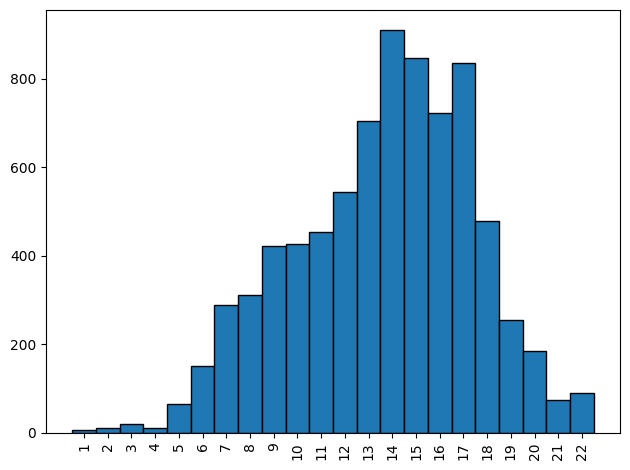

In [20]:
# Histograma 
hist, bins = np.histogram(df['Rating_OE'],range(1,24))

print("Bins: ", bins)
print("Frecuencias: ", hist)

plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor="black", align="edge")

plt.xticks((bins[:-1] + np.diff(bins)/2), bins[:-1], rotation='vertical')
plt.tight_layout()

plt.show()

<Axes: >

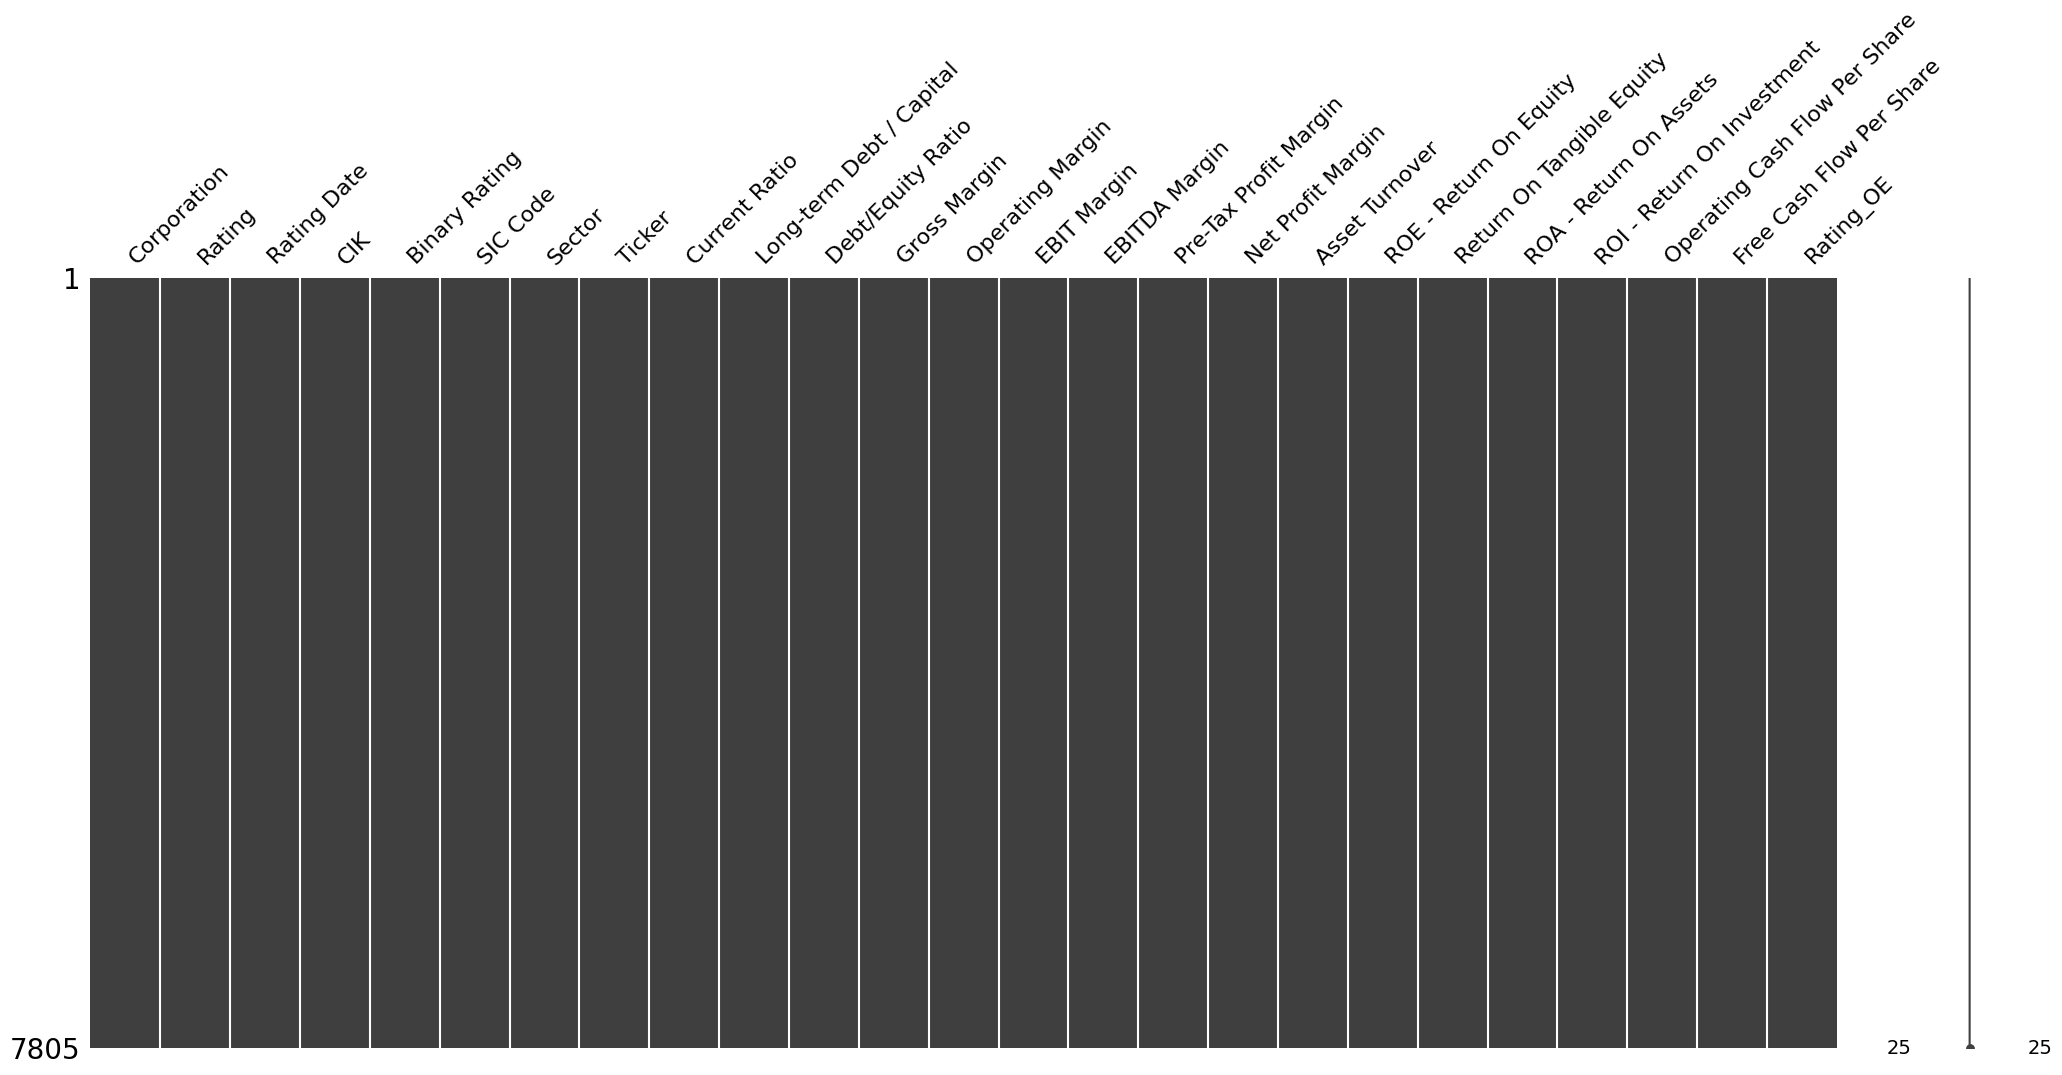

In [21]:
# Valores Faltantes.
msno.matrix(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Corporation                    7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Rating Date                    7805 non-null   object 
 3   CIK                            7805 non-null   int64  
 4   Binary Rating                  7805 non-null   int64  
 5   SIC Code                       7805 non-null   float64
 6   Sector                         7805 non-null   object 
 7   Ticker                         7805 non-null   object 
 8   Current Ratio                  7805 non-null   float64
 9   Long-term Debt / Capital       7805 non-null   float64
 10  Debt/Equity Ratio              7805 non-null   float64
 11  Gross Margin                   7805 non-null   float64
 12  Operating Margin               7805 non-null   f

In [23]:
# Cambiar Formato Object a Category.
Columnas = ['Rating', 'Binary Rating', 'SIC Code', 'Sector']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('category')
    return df

df = Cambio_Formato(df, Columnas)

In [24]:
df['Corporation'] = df['Corporation'].astype('string')
df['Ticker'] = df['Ticker'].astype('string')

In [25]:
# Año, Mes, Semana, Día de la Semana
df['Rating Date'] = pd.to_datetime(df['Rating Date'])
df['Year'] = df['Rating Date'].dt.year.astype('int64')
df['Month'] = df['Rating Date'].dt.month.astype('int64')
df['Week'] = df['Rating Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Rating Date'].dt.day_of_week.astype('int64')

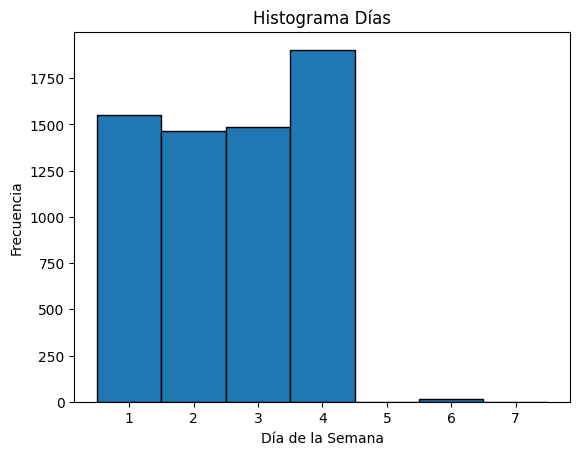

In [26]:
# Histograma Días.
plt.hist(df['Day'], bins=range(1,9), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

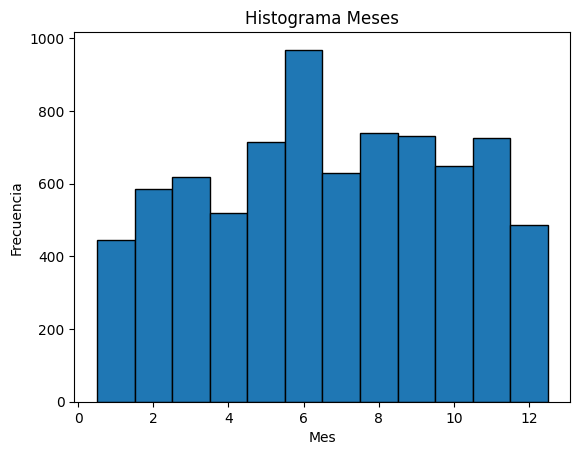

In [27]:
# Histograma Meses.
plt.hist(df['Month'], bins=range(1,14), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

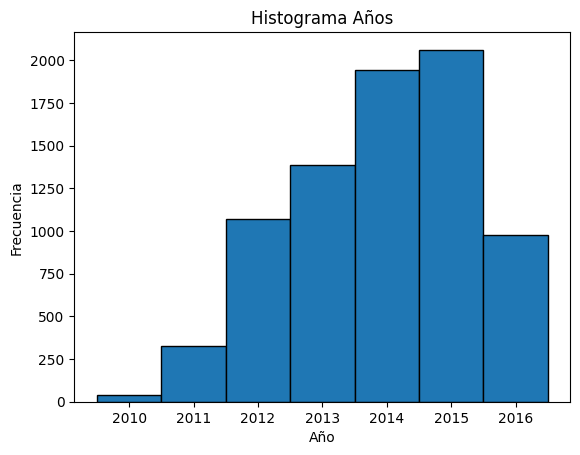

In [28]:
# Histograma Años.
plt.hist(df['Year'], bins=range(2010,2018), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [29]:
# Eliminas la columna SIC Code, ya que solo es un identificador único de la Industria, en términos de comprensión, se hace más fácil trabajar con la Columna Sector.
df = df.drop(columns=['CIK', 'SIC Code'])
df.head(5)

,Corporation,Rating,Rating Date,Binary Rating,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,...,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Rating_OE,Year,Month,Week,Day
0,American States Water Co.,A-,2010-07-30,1,Utils,AWR,1.1507,0.4551,0.8847,77.6230,...,8.1978,2.6385,4.4530,1.9957,-0.1333,16,2010,7,30,4
1,Automatic Data Processing Inc.,AAA,2010-09-16,1,BusEq,ADP,1.1129,0.0072,0.0073,43.6619,...,47.2858,4.4944,21.8765,0.2501,0.3132,22,2010,9,37,3
2,Avnet Inc.,BBB-,2010-11-23,1,Shops,AVT,1.9276,0.2924,0.4255,11.9008,...,16.7991,5.2731,9.6494,-7.6079,-7.3231,13,2010,11,47,1
3,California Water Service Co.,AA-,2010-06-29,1,Utils,CWT,0.8358,0.4708,0.9491,64.5096,...,9.7015,2.6583,5.1018,1.7438,-0.8999,19,2010,6,26,1
4,Cardinal Health Inc.,A,2010-07-14,1,Shops,CAH,1.2931,0.2644,0.4036,3.8385,...,19.4184,2.9364,8.1844,1.9725,2.4174,17,2010,7,28,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Corporation                    7805 non-null   string        
 1   Rating                         7805 non-null   category      
 2   Rating Date                    7805 non-null   datetime64[ns]
 3   Binary Rating                  7805 non-null   category      
 4   Sector                         7805 non-null   category      
 5   Ticker                         7805 non-null   string        
 6   Current Ratio                  7805 non-null   float64       
 7   Long-term Debt / Capital       7805 non-null   float64       
 8   Debt/Equity Ratio              7805 non-null   float64       
 9   Gross Margin                   7805 non-null   float64       
 10  Operating Margin               7805 non-null   float64       
 11  EBIT Margin      

In [31]:
# Agrupamos la clasificación de una compañía para un mes y año en particular, para identificar si es que existe más de una clasificación en un mismo periodo contable.
df_grouped = df.groupby(['Year', 'Month', 'Corporation'])['Rating'].nunique()

In [32]:
df_grouped.describe().round(2)

count    7285.00
mean        1.03
std         0.18
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00
Name: Rating, dtype: float64

In [33]:
# Existen casos en los cuales tenemos 2 o 3 clasificaciones diferentes de una empresa para un mismo año, mes.
df_grouped.value_counts()

Rating
1    7063
2     218
3       4
Name: count, dtype: int64

In [34]:
# Agrupamos nuevamente, pero ahora considerando la fecha más antigua para un mismo mes año, intentando tomar la fecha más cercana al fin del periodo contable. 
df = df.loc[df.groupby(['Year','Month','Corporation'])['Rating Date'].idxmax()]

In [35]:
# Se reduce el df de (7805, 28) a (7285, 28)
df.shape

(7285, 27)

In [36]:
# Valores Duplicados.
df.duplicated().sum()

0

In [37]:
df.describe().round(1)

,Rating Date,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,...,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share,Rating_OE,Year,Month,Week,Day
count,7285,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,...,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0,7285.0
mean,2014-06-02 21:31:09.430336256,1.9,0.5,0.2,42.5,11.5,11.5,20.0,8.6,6.0,...,20.0,4.6,7.0,0.5,0.1,13.7,2013.9,6.7,27.6,2.1
min,2010-04-06 00:00:00,0.2,-86.4,-1473.1,-87.7,-461.8,-461.8,-360.8,-476.0,-414.8,...,-14023.3,-226.4,-745.5,-91.3,-130.7,1.0,2010.0,1.0,1.0,0.0
25%,2013-07-22 00:00:00,1.1,0.3,0.4,22.5,6.1,6.1,11.1,4.0,2.6,...,-11.8,2.4,3.7,-0.4,-0.7,11.0,2013.0,4.0,17.0,1.0
50%,2014-07-22 00:00:00,1.5,0.4,0.8,39.6,12.1,12.1,18.3,9.7,6.9,...,10.6,4.7,7.4,0.2,0.1,14.0,2014.0,7.0,27.0,2.0
75%,2015-07-01 00:00:00,2.2,0.5,1.2,59.6,19.4,19.4,30.5,16.6,12.2,...,26.9,7.9,12.5,1.1,1.0,16.0,2015.0,9.0,39.0,3.0
max,2016-12-27 00:00:00,34.1,171.5,194.4,100.0,94.0,94.0,286.5,221.3,219.4,...,9883.0,114.7,466.7,282.2,107.7,22.0,2016.0,12.0,53.0,6.0
std,NaN,1.9,2.7,34.4,23.7,25.2,25.2,24.3,27.7,24.0,...,455.4,9.3,25.0,6.2,7.4,3.8,1.4,3.2,14.0,1.4


In [38]:
df.describe(include='category')

,Rating,Binary Rating,Sector
count,7285,7285,7285
unique,22,2,12
top,BBB,1,Other
freq,838,4749,1168


In [39]:
df.describe(include='string')

,Corporation,Ticker
count,7285,7285
unique,1377,678
top,Chevron Corporation,DTE
freq,20,40


5.2 Valores Atípicos, Outliers.

In [40]:
df[['Current Ratio','Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share']].describe()

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
count,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000,7285.000000
mean,1.920952,0.451092,0.179540,42.475407,11.482416,11.531860,20.014391,8.632582,5.969324,0.851955,15.098357,20.044538,4.562581,7.030158,0.498980,0.114555
std,1.899438,2.719571,34.366413,23.666902,25.192278,25.204118,24.261411,27.736793,23.974254,0.695264,233.138195,455.447710,9.261227,24.998133,6.196789,7.378883
min,0.174900,-86.363600,-1473.098000,-87.684000,-461.787800,-461.787800,-360.816900,-476.010000,-414.824800,0.068400,-11258.210000,-14023.260000,-226.442500,-745.454500,-91.330200,-130.665800
25%,1.077500,0.286500,0.419900,22.502500,6.071200,6.141300,11.059900,3.992300,2.588400,0.402000,6.030100,-11.801600,2.384300,3.683700,-0.446300,-0.707600
50%,1.503500,0.424900,0.751300,39.635800,12.117400,12.143800,18.279800,9.650400,6.916300,0.662900,12.454700,10.617100,4.743600,7.440800,0.236100,0.133500
75%,2.167600,0.537900,1.208200,59.641700,19.383400,19.406900,30.470900,16.604200,12.239500,1.039900,20.336600,26.906300,7.881200,12.542400,1.094200,0.997800
max,34.076800,171.500000,194.375000,100.000000,93.993000,93.993000,286.493500,221.289400,219.390300,8.503900,7038.461000,9882.979000,114.716900,466.666700,282.192100,107.737700


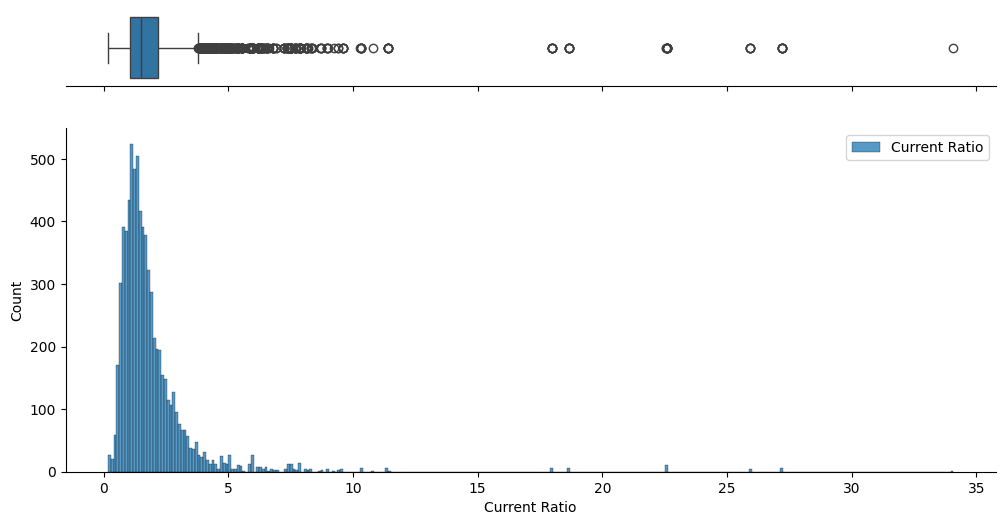

In [41]:
# Box Plot 1
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

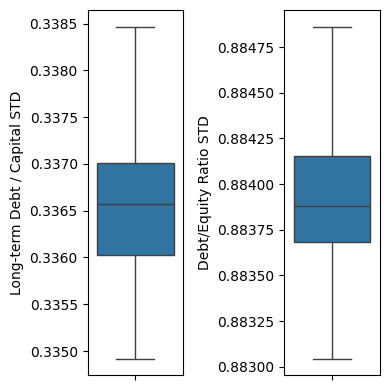

In [42]:
# Box Plot 2
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

from sklearn.preprocessing import MinMaxScaler

df['Long-term Debt / Capital STD'] = df['Long-term Debt / Capital']
df['Debt/Equity Ratio STD'] = df['Debt/Equity Ratio']

variables = ['Long-term Debt / Capital STD', 'Debt/Equity Ratio STD']

scaler = MinMaxScaler()
df[variables] = scaler.fit_transform(df[variables])

fig, axes = plt.subplots(1, len(variables), figsize=(4,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()
plt.show()

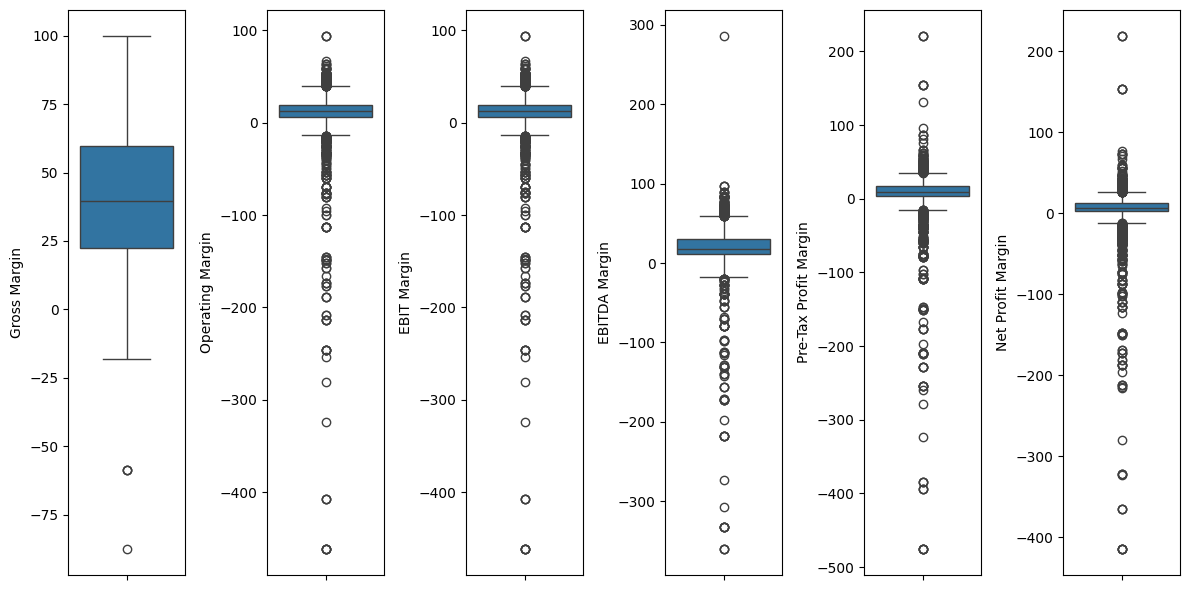

In [43]:
# Box Plot 3
variables = ['Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin']

fig, axes = plt.subplots(1, len(variables), figsize=(12,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

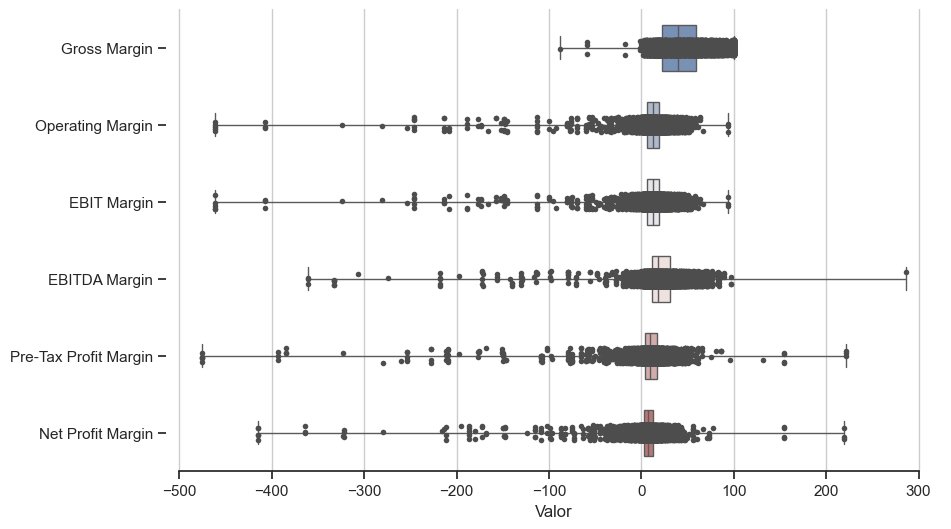

In [54]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(10,6))
#ax.set_xscale('log')

margins = ['Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin']

df_melted = df[margins].melt(var_name='Margen', value_name='Valor')

sns.boxplot(data=df_melted, x='Valor', y='Margen', hue='Margen', whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(data=df_melted, x='Valor', y='Margen', size=4, color=".3")

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.show()

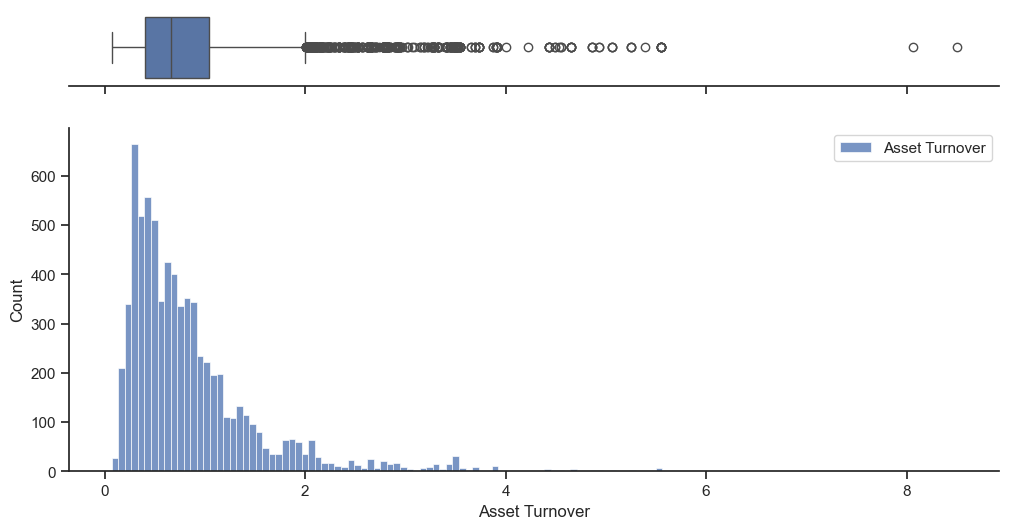

In [45]:
# Box Plot 4
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.20, .9)})
sns.boxplot(df['Asset Turnover'], ax=ax_box, orient="h") 
sns.histplot(df['Asset Turnover'], ax=ax_hist, label='Asset Turnover')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

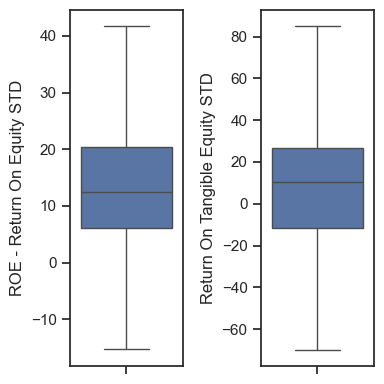

In [46]:
# Box Plot 5
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['ROE - Return On Equity STD'] = df['ROE - Return On Equity']
df['Return On Tangible Equity STD'] = df['Return On Tangible Equity']

variables = ['ROE - Return On Equity STD', 'Return On Tangible Equity STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

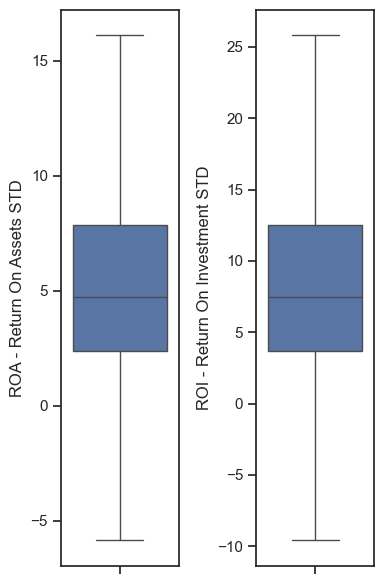

In [47]:
# Box Plot 6
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['ROA - Return On Assets STD'] = df['ROA - Return On Assets']
df['ROI - Return On Investment STD'] = df['ROI - Return On Investment']

variables = ['ROA - Return On Assets STD', 'ROI - Return On Investment STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

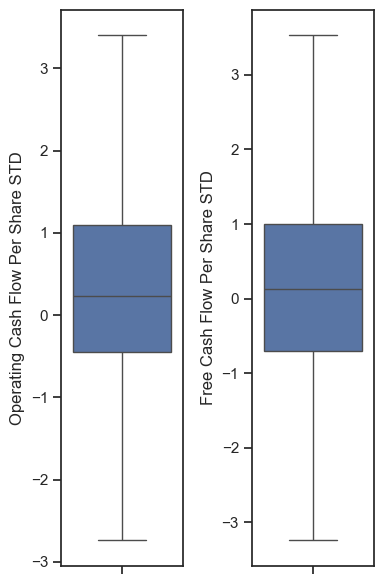

In [48]:
# Box Plot 7
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

df['Operating Cash Flow Per Share STD'] = df['Operating Cash Flow Per Share']
df['Free Cash Flow Per Share STD'] = df['Free Cash Flow Per Share']

variables = ['Operating Cash Flow Per Share STD', 'Free Cash Flow Per Share STD']

fig, axes = plt.subplots(1, len(variables), figsize=(4,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()

5.3 Correlación de Pearson.

In [49]:
columns_float64 = df.select_dtypes(include='float64').columns

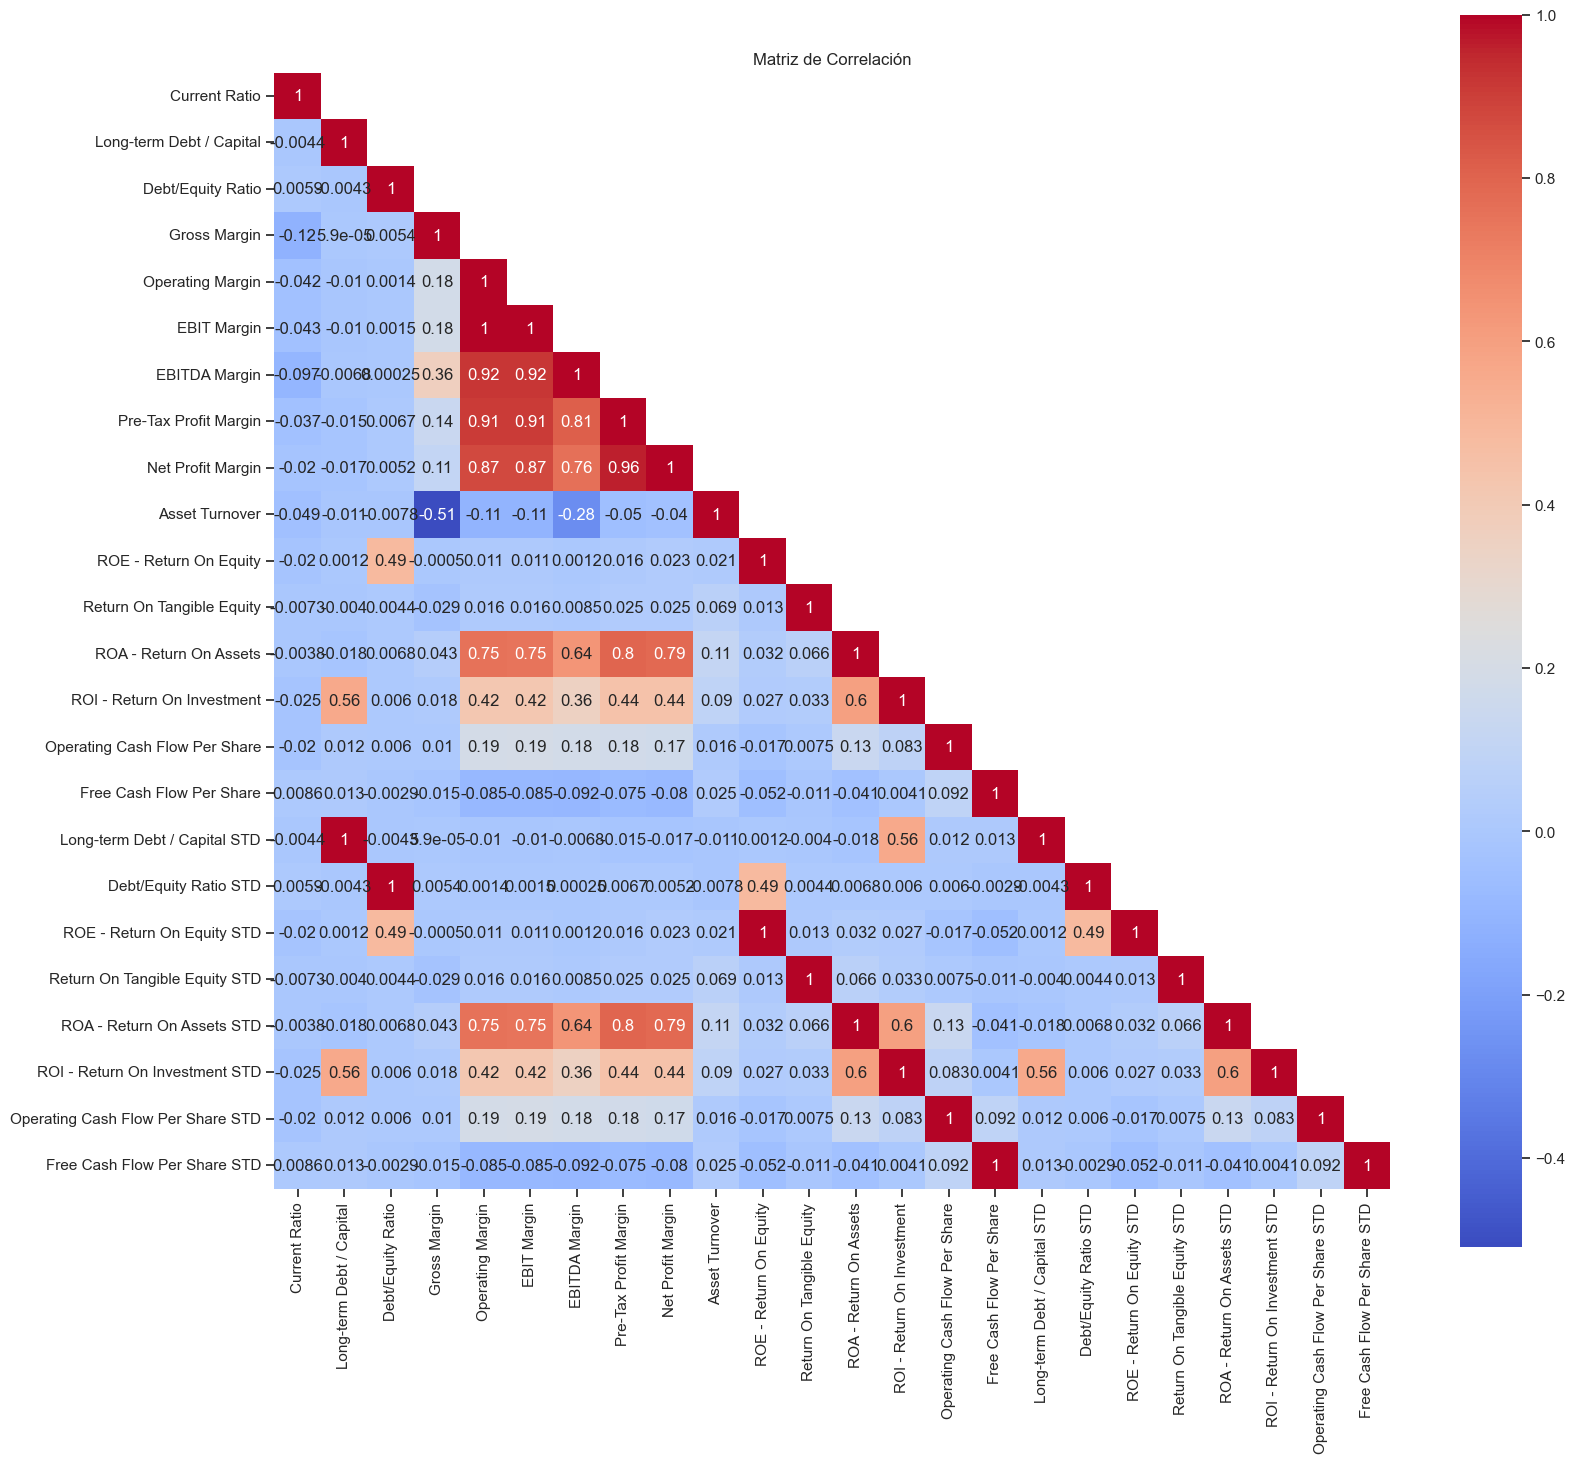

In [50]:
# Correlación Entre Variables.
df_float64 = df[columns_float64]
matriz_corr = df_float64.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool), k=1)

# Gráfico de correlación
plt.figure(figsize=(18, 16))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Matriz de Correlación')
plt.show()

6. Data Wrangling (Munging)

6.1 Tratamiento de Valores Atípicos

6.2 Estandarización Variables

7. Selección del Algoritmo

8. Desarrollo del Algoritmo

9. Validación y Despliegue

10. Conclusiones y Recomendaciones